In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#loading the eda_data csv file
df = pd.read_csv("/content/drive/MyDrive/eda_data.csv")
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,state_job,same_state,company_age,python_yn,r_studio_yn,spark_yn,aws_yn,excel_yn,simplified_job,simplified_seniority,desc_length,num_comp
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,0,49,1,0,0,0,1,data scientist,na,2536,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System,MD,0,38,1,0,0,0,0,data scientist,na,4783,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4,FL,1,12,1,0,1,0,1,data scientist,na,3461,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL,WA,1,57,1,0,0,0,0,data scientist,na,3883,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions,NY,1,24,1,0,0,0,1,data scientist,na,2728,3


## choose relevant columns

In [3]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'state_job', 'same_state', 'company_age', 'python_yn',
       'r_studio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'simplified_job',
       'simplified_seniority', 'desc_length', 'num_comp'],
      dtype='object')

In [4]:
df_model = df[['avg_salary','Rating','Size','Type of ownership', 'Industry', 'Sector', 'Revenue',
             'num_comp','hourly', 'employer_provided','state_job', 'same_state', 
             'company_age','python_yn','r_studio_yn', 'spark_yn', 'aws_yn',
             'excel_yn', 'simplified_job','simplified_seniority', 'desc_length']]

## get dummy data (so e.g. like analyst will get a specific col and when anaylst value =1 when it appears in that col)

In [5]:
df_dummy = pd.get_dummies(df_model)
df_dummy.head()

,avg_salary,Rating,num_comp,hourly,employer_provided,same_state,company_age,python_yn,r_studio_yn,spark_yn,aws_yn,excel_yn,desc_length,Size_-1,Size_1 to 50 employees,Size_10000+ employees,Size_1001 to 5000 employees,Size_201 to 500 employees,Size_5001 to 10000 employees,Size_501 to 1000 employees,Size_51 to 200 employees,Size_Unknown,Type of ownership_-1,Type of ownership_College / University,Type of ownership_Company - Private,Type of ownership_Company - Public,Type of ownership_Government,Type of ownership_Hospital,Type of ownership_Nonprofit Organization,Type of ownership_Other Organization,Type of ownership_School / School District,Type of ownership_Subsidiary or Business Segment,Type of ownership_Unknown,Industry_-1,Industry_Accounting,Industry_Advertising & Marketing,Industry_Aerospace & Defense,Industry_Architectural & Engineering Services,Industry_Auctions & Galleries,Industry_Banks & Credit Unions,...,state_job_FL,state_job_GA,state_job_IA,state_job_ID,state_job_IL,state_job_IN,state_job_KS,state_job_KY,state_job_LA,state_job_MA,state_job_MD,state_job_MI,state_job_MN,state_job_MO,state_job_NC,state_job_NE,state_job_NJ,state_job_NM,state_job_NY,state_job_OH,state_job_OR,state_job_PA,state_job_RI,state_job_SC,state_job_TN,state_job_TX,state_job_UT,state_job_VA,state_job_WA,state_job_WI,simplified_job_analyst,simplified_job_data engineer,simplified_job_data scientist,simplified_job_director,simplified_job_manager,simplified_job_mle,simplified_job_na,simplified_seniority_junior,simplified_seniority_na,simplified_seniority_senior
0,72.0,3.8,0,0,0,0,49,1,0,0,0,1,2536,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,87.5,3.4,0,0,0,0,38,1,0,0,0,0,4783,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,85.0,4.8,0,0,0,1,12,1,0,1,0,1,3461,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,76.5,3.8,3,0,0,1,57,1,0,0,0,0,3883,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,114.5,2.9,3,0,0,1,24,1,0,0,0,1,2728,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


## train -test split

In [6]:
x = df_dummy.iloc[:,1:]
# print(x)
y = df_dummy.avg_salary.values
print(y)

[ 72.   87.5  85.   76.5 114.5  95.   73.5 114.   61.  140.  163.5  85.
 139.   65.5 113.5 146.  102.  153.5 142.5  87.5 105.5  96.  112.5  84.
 143.   86.5  99.5  47.5  84.   85.   76.5  96.  114.5 121.  112.5 106.
 107.  110.  147.5 106.   88.   98.5 142.5  82.5 130.  155.  184.5  29.5
  86.5  81.   91.  114.5  68.  115.  109.5  75.5 154.5 143.5  73.5  95.
 107.  115.  139.5  67.   85.  118.   79.5  56.5 128.5  97.5  66.5 179.5
  76.  112.   98.  128.  150.5  87.5 110.  113.5 124.   56.5 130.   77.5
  87.   53.5 139.  114.   85.5  48.   48.  174.   85.  106.5  72.5  85.5
  97.5  99.   56.5 133.  121.   85.5  87.5 237.5  95.5 104.5  56.5  55.
  61.5 157.   78.  113.5 140.  132.5 108.   80.5 107.5  95.  119.5 134.
 100.5 107.5 122.   92.5  62.   39.5 107.5  40.5  89.5  81.  147.   85.
  81.5 168.  100.5  97.   85.  153.5 132.5 100.  105.   87.  103.5 124.
  67.   87.  137.5 100.  106.5  98.5  61.  106.5  84.5 109.5 164.  169.
 142.   76.5 107.  171.5  96.  142.5 107.  145.   61.5  20.5

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test  = train_test_split(x,y,test_size=0.2,random_state = 42)

## Implementing Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score  #takes sample dataset and validation set and runs it on model and checks whether it generalizes it or not {mini train-test set},baseline on whihc we're gonna evaluate our model on
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [23]:
np.mean(cross_val_score(lm,X_train,y_train,scoring='neg_mean_absolute_error',cv=3))
#here we're talking about how it is difficiult to get good values from sparse matrix of multi linear regression model;due to limited data so let's check with lasso model as it normalizes the data

-216708870.6555966

## Lasso regression

In [45]:
#alpha-- normalization, so inc in alpha value more smoother the data
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.13)
lasso.fit(X_train,y_train)

Lasso(alpha=0.13)

In [18]:
np.mean(cross_val_score(lasso,X_train,y_train,scoring='neg_mean_absolute_error',cv=3))

-21.0726204545105

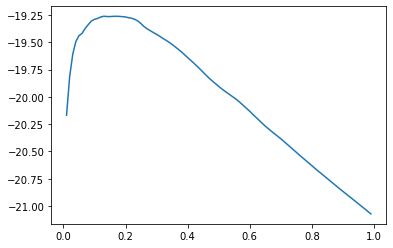

In [13]:
#trying different values of alpha to check which is best
alpha = []
error = []
for i in range(1,100):
  alpha.append(i/100)
  lasso = linear_model.Lasso(alpha=(i/100))
  error.append(np.mean(cross_val_score(lasso,X_train,y_train,cv = 3,scoring='neg_mean_absolute_error')))

plt.plot(alpha,error)

In [28]:
np.argmax(error)
error[12]

-19.260954991440297

Another method to find max value of alpha by converting to tuple

In [17]:
#so finding the max value of alpha from graph
err = tuple(zip(alpha,error))
#convert to df
df_err = pd.DataFrame(err,columns=['alpha','error'])  #to attain max value
df_err[df_err.error == max(df_err.error)]

,alpha,error
12,0.13,-19.260955


## Random Forest Regressor

In [31]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

#checking cross_val_score
np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error',cv = 3))

-14.972408902903824

## Tuning the models using GridSearchCV

In [38]:
#so gridsearchcv tune all the models and provides the one as o/p which shows best results
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'),'max_features':("auto", "sqrt", "log2")}
gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: 

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [39]:
gs.best_score_

-14.843014591613953

In [40]:
gs.best_estimator_

RandomForestRegressor(criterion='mse', n_estimators=270)

## Using Ridge Regression

In [65]:
from sklearn.linear_model import Ridge
ridge= Ridge(alpha=0.99)
ridge.fit(X_train,y_train)
np.mean(cross_val_score(ridge, X_train, y_train, scoring='neg_mean_absolute_error', cv=3))

-19.35696326832665

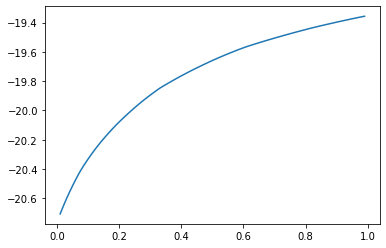

In [59]:
alpha = []
error = []
for i in range(1,100):
  alpha.append(i/100)
  ridge = linear_model.Ridge(alpha=(i/100))
  error.append(np.mean(cross_val_score(ridge,X_train,y_train,cv = 3,scoring='neg_mean_absolute_error')))

plt.plot(alpha,error)

In [64]:
#so finding the max value of alpha from graph
errer = tuple(zip(alpha,error))
#convert to df
df_errer = pd.DataFrame(errer,columns=['alpha','error'])  #to attain max value
df_errer[df_errer.error == max(df_errer.error)]

,alpha,error
98,0.99,-19.356963


### Test ensembles

In [66]:
t_pred_lm = lm.predict(X_test)
t_pred_lasso = lasso.predict(X_test)
t_pred_ridge = ridge.predict(X_test)
t_pred_rf = gs.best_estimator_.predict(X_test)

In [50]:
from sklearn.metrics import mean_absolute_error as mae
mae(y_test,t_pred_lm)


2471194482.830196

In [51]:
mae(y_test,t_pred_lasso)


19.66536838335135

In [52]:
mae(y_test,t_pred_rf)

11.028958488690032

In [67]:
mae(y_test,t_pred_ridge)

18.881758780818366

Averaging the predictions made by the weak classifiers and voted Random Forest regressor to be proving better resukts than others. Moreover, averaging the predictions of the models and taking a pick.

In [70]:
#this seems to be not working for us at all
mae(y_test,(t_pred_lm + t_pred_ridge)/2)

1235597250.3673837

In [55]:
#this seems to be not working for us at all
mae(y_test,(t_pred_lm + t_pred_rf)/2)

1235597246.2794352

In [69]:
mae(y_test,(t_pred_ridge + t_pred_lasso)/2)

18.98498706060846

In [56]:
#taking average optimal weights of the model rf and lasso as linear reg is not working for us
mae(y_test,(t_pred_lasso + t_pred_rf)/2)

14.843518595694906

In [68]:
mae(y_test,(t_pred_ridge + t_pred_rf)/2)

14.266367447435812